In [104]:
import numpy as np


In [105]:
# Define the model to use for tests, basic SIR

modelFlows = {
    'beta * S * I' : ['S','I'],
    'gamma * I' : ['I',None]
}

varsMeta = ['S','I']
parsMeta = ['beta','gamma']



In [106]:
x = np.array([0.9,0.1])
p1 = 2/7
p2 = 1.5/7
ps = [p1,p2]

def testFunc(t,x,beta,gamma):

    S,I = x 

    dS = - beta * S * I 
    dI = + beta * S * I - gamma * I 

    return [dS,dI]

testFunc(0,x,p1,p2)

[-0.025714285714285714, 0.004285714285714285]

In [107]:
# dxdt = np.zeros(x.shape)

# for i in range(len(varsMeta)):
#     vName = varsMeta[i]
#     exec(vName+' = x['+str(i)+']')
    
# for i in range(len(parsMeta)):
#     pName = parsMeta[i]
#     exec(pName+' = ps['+str(i)+']')


# allFlows = np.zeros(len(modelFlows))
# i = 0
# for key in modelFlows:
#     # curFlowVal = eval(key)
#     # print(f'{key}: {curFlowVal}')
#     allFlows[i] = eval(key)
#     i = i + 1

# for i in range(len(varsMeta)):
#     curVal = 0
#     curVarName = varsMeta[i]
#     for j in range(len(modelFlows)):
#         curFlow = list(modelFlows.items())[j]
#         curOut = curFlow[1][0]
#         curIn = curFlow[1][1]
#         if (curOut == curVarName):
#             curVal -= allFlows[j]
#         if (curIn == curVarName):
#             curVal += allFlows[j]
#     dxdt[i] = curVal

# dxdt

In [108]:
def curFunc(t,x,ps,varsMeta,parsMeta):

    # Go through variable names and get inputs
    for i in range(len(varsMeta)):
        vName = varsMeta[i]
        exec(vName+' = x['+str(i)+']')
        
    # Go through parameter names and save
    for i in range(len(parsMeta)):
        pName = parsMeta[i]
        exec(pName+' = ps['+str(i)+']')

    # Calculate the value of each current flow
    allFlows = np.zeros(len(modelFlows))
    i = 0
    for key in modelFlows:
        allFlows[i] = eval(key)
        i = i + 1

    # Initialize outputs as zero
    dxdt = np.zeros(x.shape)
    # Go through each variable
    for i in range(len(varsMeta)):
        # # Make sure the current output is zero
        # dxdt[i] = 0
        # Get the name of the current variable
        curVarName = varsMeta[i]
        # Go through each flow
        for j in range(len(modelFlows)):
            # Get the current flow
            curFlow = list(modelFlows.items())[j]
            # Identify inputs and outputs
            curOut = curFlow[1][0]
            curIn = curFlow[1][1]
            # If the flow is an output of the current variable, subtract the flow-value
            if (curOut == curVarName):
                dxdt[i] -= allFlows[j]
            # If the flow is an input of the current variable, add the flow-value
            if (curIn == curVarName):
                dxdt[i] += allFlows[j]

    return dxdt

curFunc(0,x,ps,varsMeta,parsMeta)

# Make a shorter function call for use in solve_ivp
def ModelCallToReturn(t,x,*args):
    return curFunc(t,x,args,varsMeta,parsMeta)

ModelCallToReturn(0,x,p1,p2)

array([-0.02571429,  0.00428571])

In [109]:
# Testing:

from scipy.integrate import solve_ivp

t0 = 0
tEnd = 100
TimeRange = np.arange(t0,tEnd) 
InitArray = [0.99,0.01]
ParsArray = (p1,p2)


sol = solve_ivp(testFunc,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)
sol2 = solve_ivp(ModelCallToReturn,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)


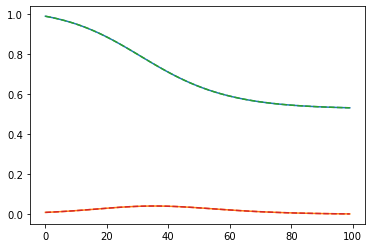

In [110]:
import matplotlib.pyplot as plt 

plt.figure() 
plt.plot(sol.t,sol.y[0,:])
plt.plot(sol.t,sol.y[1,:])
plt.plot(sol2.t,sol2.y[0,:],'--')
plt.plot(sol2.t,sol2.y[1,:],'--')

# Test some arbitrary models

In [123]:
modelFlows = {
    'alpha * X' : [None,'X'],
    'beta * X * Y' : ['X',None],
    'delta * X * Y' : [None,'Y'],
    'gamma * Y' : ['Y',None],
    'gamma * X * X' : ['X',None],
}

varsMeta = ['X','Y']
parsMeta = ['alpha','beta','delta','gamma']



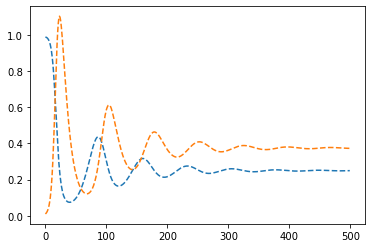

In [124]:
t0 = 0
tEnd = 500
TimeRange = np.arange(t0,tEnd) 
InitArray = [0.99,0.01]
ParsArray = [0.1,0.2,0.4,0.1]


curSol = solve_ivp(ModelCallToReturn,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)

plt.figure() 
plt.plot(curSol.t,curSol.y[0,:],'--')
plt.plot(curSol.t,curSol.y[1,:],'--')